In [21]:
from PIL import Image
import numpy as np
import sys

In [22]:
image = Image.open('../../data/tmp/20160905_193459_0c37_3B_Visual.tif')

In [ ]:
image

Type:        property
String form: <property object at 0x10e138458>
Docstring:   <no docstring>


In [ ]:
test = image.rotate(-20, expand=True)
test = test.crop(test.getbbox())
test

Sizes

In [28]:
h, w = image.size
h * w

40578125

In [29]:
th, tw = test.crop(test.getbbox()).size
th * tw < h * w

True

bounding boxes

In [26]:
image.getbbox()

(0, 1, 6124, 6624)

In [27]:
test.getbbox()

(0, 0, 7060, 5244)

In [30]:
image1 = image.copy()
image2 = image.copy()

In [31]:
h1, w1 = image1.size
h2, w1 = image2.size

In [34]:
image2 = image2.rotate(1, expand=True)
image2 = image2.crop(image2.getbbox())

In [36]:
h2, w2 = image2.size
(h2 * w2) < (h1 * w1)

True

In [51]:
image1 = image.copy()
image2 = image.copy()
h1, w1 = image1.size
h2, w2 = image2.size

i = 0
image2 = image2.rotate(-1, expand=True)
image2 = image2.crop(image2.getbbox())
h2, w2 = image2.size

while (h1 * w1) > (h2 * w2):
    image1 = image2.copy()
    h1, w1 = image1.size
    
    image2 = image2.rotate(-1, expand=True)
    image2 = image2.crop(image2.getbbox())
    h2, w2 = image2.size
    i -= 1
    
image2 = image2.rotate(1, expand=True)
image2 = image2.crop(image2.getbbox())
h2, w2 = image2.size

while (h1 * w1) > (h2 * w2):
    image1 = image2.copy()
    h1, w1 = image1.size
    
    image2 = image2.rotate(1, expand=True)
    image2 = image2.crop(image2.getbbox())
    h2, w2 = image2.size
    i += 1

print('Adjusted {} degrees'.format(i))

Adjusted -42 degrees


In [69]:
rotations = {}
for i in range(10):
    image1 = image.copy()
    bbox = image1.rotate(i, expand=True).getbbox()
    area1 = np.product(image1.crop(bbox).size)
    rotations[i] = area1
    sys.stdout.write("\rRotation: {}".format(i))
    sys.stdout.flush()

Rotation: 9

In [108]:
# define a function to rotate an image until it is landscape
image1 = image.copy()
h1, w1 = image1.size

# testing
h2, w2 = h1, w1
print((h1, w1), (h2, w2))

# for i in range(180):
#     tmp = image1.copy()
#     tmp = tmp.rotate(i, expand=True)
#     h2, w2 = tmp.crop(tmp.getbbox()).size
#     if w2 > w1 or h2 < h1:
#         sys.stdout.write("\rRotation: {}".format(i))
#         sys.stdout.flush()
#     else:
#         print((h1, w1), (h2, w2))
#         break

for i in range(180):
    tmp = image1.copy()
    tmp = tmp.rotate(-i, expand=True)
    tmp = tmp.crop(tmp.getbbox())
    h2, w2 = tmp.size

    if h2 * w2 < h1 * w1:
        sys.stdout.write("\rRotation: {}".format(-i))
        sys.stdout.flush()
    else:
        print((h1, w1), (h2, w2))
        break

(6125, 6625) (6125, 6625)
Rotation: 0(6125, 6625) (6190, 6572)


In [ ]:
toy = image.rotate(-25, expand=True)
toy = toy.crop(toy.getbbox())
toy

In [20]:
toy.size

NameError: name 'toy' is not defined

In [130]:
image1 = image.copy()
image1 = image1.crop(image1.getbbox())
size1 = np.product(image1.size)
print('Original area: {}'.format(size1))

areas = []
for i in range(360):
    image2 = image.copy()
    image2 = image2.rotate(i, expand=True)
    image2 = image2.crop(image2.getbbox())
    size2 = np.product(image2.size)
    areas.append(size2)
    sys.stdout.write("\rRotation: {}".format(i))

Original area: 40559252
Rotation: 359

In [131]:
import matplotlib.pyplot as plt

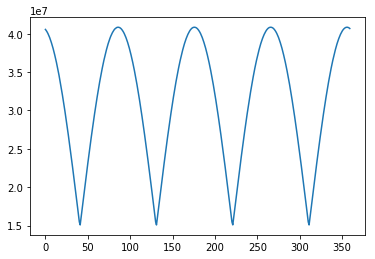

In [135]:
areas = np.array(areas)
rotations = np.arange(360)

plt.plot(rotations, areas)

In [150]:
rotations[np.argmin(areas)]

41

In [145]:
image1 = image.copy()
area1 = np.product(image1.size)

condition = True
i = 1
while condition:
    image2 = image1.copy()
    image2 = image2.rotate(i, expand=True)
    image2 = image2.crop(image2.getbbox())
    area2 = np.product(image2.size)
    condition = area2 < area1

    i += 1
    area1 = area2
    sys.stdout.write("\rRotation: {}".format(i))

result = image.copy()
result = result.rotate(i - 1, expand=True)
result = result.crop(result.getbbox())

Rotation: 43

In [ ]:
result = image.copy()
result = result.rotate(i - 1, expand=True)
result = result.crop(result.getbbox())
result

In [159]:
size = result.size
bbox = result.getbbox()
size, bbox

((2180, 6899), (0, 0, 2180, 6899))

In [176]:
def brute_force_auto_rotate(image):
    img = image.copy()
    areas = []
    for i in range(45):
        img = img.rotate(-i, expand=True)
        img = img.crop(img.getbbox())
        areas.append(np.product(img.size))
        
    return -np.argmin(areas)

In [196]:
def _get_area(img, degree_rotation):
    img = img.rotate(degree_rotation, expand=True)
    img = img.crop(img.getbbox())
    return np.prod(img.size)

def parallel_auto_rotate(image, processes=4):
    img = image.copy()
    
    pool = multiprocessing.Pool(processes=processes)
    result = pool.starmap(_get_area, zip(repeat(img), range(45)))
    return np.argmin(result)

In [193]:
import multiprocessing
from itertools import product, repeat

In [ ]:
toy = image.copy()
degrees = parallel_auto_rotate(toy)
print(degrees)
toy = toy.rotate(degrees, expand=True)
toy = toy.crop(toy.getbbox())
toy

41


In [9]:
import numpy as np
np.arange(-10, step=-1)

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [14]:
from datetime import datetime

In [10]:
name = 'PSScene3Band_1235_34973495_ab_visual.tiff'

In [19]:
today = datetime.today().strftime('%Y%m%d_%H%M%S')
name[:name.find('.')] + f'_annotated_{today}.tiff'

'PSScene3Band_1235_34973495_ab_visual_annotated_20181125_202249.tiff'